# 3.2.3 - Support Vector Machine - SVM


* En este Notebook vamos a ver el ***Support Vector Machine***, que es un ***Algoritmo de Aprendizaje de Clasificación***, y vamos a ***resolver un problema de clasificación usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Support Vector Machine - SVM](#M1)
<span></span><br>
    2. [Support Vector Machine (Kernels)](#M2)
<span></span><br>
    3. [Ejemplo de Clasificación con SVM (3 Clases): Clasificación de tipos de flores](#M3)
    <span></span><br>
    3.1. [Carga de datos](#M31)
    <span></span><br>
        3.2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M32)
    <span></span><br>
        3.3. [Visualización de los datos](#M33)
    <span></span><br>
        3.4. [Creacción y ajuste de los modelos](#M34)
    <span></span><br>
        3.5. [Evaluación de los modelos](#M35)
    <span></span><br>
        3.6. [Visualización de los resultados](#M36)


<hr>


## <a name="M1">1. Support Vector Machine - SVM</a>


* El ***Support Vector Machine es un Algoritmo de Aprendizaje de Clasificación que tiene como objetivo encontrar un hiperplano que separe de forma óptima dos clases*** (para el caso de la clasificación binaria) o ***una clase del resto de las clases*** para la clasificación múltiple.


* Para entender la idea del Support Vector Machine, supongamos el siguiente ejemplo de clasificación en 2 dimensiones en el que tenemos una serie de elementos con dos variables X1 y X2:


<img src="../../imgs/3_02_03_01_svm.png" style="width: 350px;"/>


* Dadas las dos clases representadas por puntos de distinto color, resultaría sencillo encontrar una recta que pudiese separar las dos clases; de hecho, podríamos encontrar infinitas rectas que separasen las dos clases. Por ejemplo podríamos definir las siguientes rectas que nos permitirían discernir entre las dos clases y todas ellas serían válidas:


<img src="../../imgs/3_02_03_02_svm.png" style="width: 350px;"/>


##### NOTA: Un hiperplano en un espacio bidimensional (2 dimensiones) es una recta.


* El Algoritmo de Aprendizaje ***Support Vector Machine*** tiene como objetivo ***encontrar la mejor recta*** (dentro de las infinitas rectas) ***que separe las dos clases, considerándose la mejor recta aquella que tenga la máxima distancia (margen) con el punto más cercano de cada clase a la recta***, que dado el ejemplo anterior sería la siguiente:


<img src="../../imgs/3_02_03_03_svm.png" style="width: 350px;"/>


* Para encontrar la mejor recta que separa las dos clases, el Algoritmo de Aprendizaje Support Vector Machine lo que hace es ***buscar el par de elementos (uno de cada clase) que mayor margen tengan***. A estos elementos se les conoce con el nombre de ***Vectores de Soporte***, de ahí el nombre del Algoritmo de Aprendizaje. Siguiendo el ejemplo anterior tenemos los siguientes elementos como vectores de soporte (para la clase azul hay dos vectores de soporte): 


<img src="../../imgs/3_02_03_04_svm.png" style="width: 350px;"/>


* En base a esos ***vectores de soporte, podemos definir dos hiperplanos*** conocidos como hiperplano positivo e hiperplano negativo en los ***que entre ellos se encuentra el margen máximo que separa las dos clase***. Todos estos conceptos vistos en el ejemplo los vamos a mostrar en la siguiente imagen:


<img src="../../imgs/3_02_03_05_svm.png" style="width: 500px;"/>

<hr>


## <a name="M2">2. Support Vector Machine (Kernels)</a>


* En el ejemplo visto anteriormente, resulta sencillo encontrar la recta óptima (o hiperplano) que separe las dos clases, pero que pasaría con un caso como el siguiente en el que no somos capaces de encontrar una recta que separe las dos clases:


<img src="../../imgs/3_02_03_06_svm.png" style="width: 300px;"/>


* Para solucionar este problema podemos ***realizar una transformación de las variables*** para encontrar una recta que separe las dos clases: 


<img src="../../imgs/3_02_03_07_svm.png" style="width: 900px;"/>


* ***Este tipo de transformaciones se realizan con "el truco" del Kernel***; siendo el kernel, una ***función que proyecta los datos originales a un espacio de variables diferente de mayor dimensión***:


<img src="../../imgs/3_02_03_08_svm.png" style="width: 600px;"/>


* De esta manera el Support Vector Machine podrá ***encontrar un hiperplano en un espacio 'n-dimensional' capaz de separar las dos clases***.


* 3 de los Kernels más usados son los siguientes:

<img src="../../imgs/3_02_03_09_svm.png" style="width: 700px;"/>

<hr>



## <a name="M3">3. Ejemplo de Clasificación con SVM (3 Clases): Clasificación de tipos de flores</a>

* En el siguiente ejemplo vamos a resolver un problema de clasificación que consiste en ***clasificar los tipos de flores, conociendo el tamaños del sépalo*** de la flor.


* Para resolver el problema de Clasificación vamos a utilizar la clase **"SVC()"** (Support Vector Classification) de la librería de Scikit-Learn, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


* El problema lo vamos a resolver utilizando todos los kernels disponibles para ver cual obtiene mejores resultados:
    - linear
    - poly
    - rbf
    - sigmoid
    - precomputed


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    3.1. [Carga de datos](#M31)
<span></span><br>
    3.2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M32)
<span></span><br>
    3.3. [Visualización de los datos](#M33)
<span></span><br>
    3.4. [Creacción y ajuste de los modelos](#M34)
<span></span><br>
    3.5. [Evaluación de los modelos](#M35)
<span></span><br>
    3.6. [Visualización de los resultados](#M36)


* En primer lugar vamos a importar las librería necesarias:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline 

<hr>


### <a name="M31">3.1. Carga de datos</a>

* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/iris/iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo


In [2]:
df = pd.read_csv("../../data/iris/iris.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
83,6.0,2.7,5.1,1.6,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
139,6.9,3.1,5.4,2.1,Iris-virginica


<hr>


### <a name="M32">3.2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>


* Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***)


* La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números:

In [3]:
X = df[['sepal_length', 'sepal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas


le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

<hr>


### <a name="M33">3.3. Visualización de los datos</a>


* Como vemos no es sencillo encontrar una recta que separe las clases Iris-Versicolor e Iris-Virginica, por lo que será interesante ver como lo clasificará el SVM tras transformar estas variables a un espacio superior de cariables al aplicar el kernel.

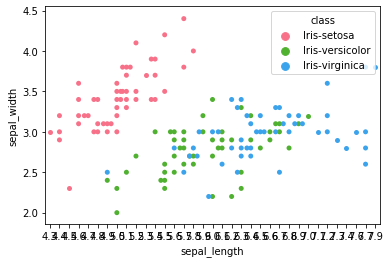

In [4]:
sns.swarmplot(x="sepal_length", y="sepal_width", hue="class", data = df, palette="husl")

<hr>


### <a name="M34">3.4. Creacción y ajuste de los modelos</a>


* Vamos a crearnos varios modelos con diferentes Kernels e hiperparámetros:
    - linear
    - poly: grados 2, 3, 4, 5 y 6
    - rbf: gamma 0.5, 1, 10, 100
    - sigmoid: gamma 0.5, 1, 10, 100
    - precomputed

In [5]:
lin_svm = SVC(kernel='linear')
poly_2_svm = SVC(kernel='poly', degree=2)
poly_3_svm = SVC(kernel='poly', degree=3)
poly_4_svm = SVC(kernel='poly', degree=4)
poly_5_svm = SVC(kernel='poly', degree=5)
poly_6_svm = SVC(kernel='poly', degree=6)
rbf_05_svm = SVC(kernel='rbf', gamma=0.5)
rbf_1_svm = SVC(kernel='rbf', gamma=1)
rbf_10_svm = SVC(kernel='rbf', gamma=10)
rbf_100_svm = SVC(kernel='rbf', gamma=100)
sig_05_svm = SVC(kernel='sigmoid', gamma=0.5)
sig_1_svm = SVC(kernel='sigmoid', gamma=1)
sig_10_svm = SVC(kernel='sigmoid', gamma=10)
sig_100_svm = SVC(kernel='sigmoid', gamma=100)

clasificadores = {'SVM Lineal': lin_svm,
                  'SVM Polinómico Grado 2': poly_2_svm,
                  'SVM Polinómico Grado 3': poly_3_svm,
                  'SVM Polinómico Grado 4': poly_4_svm,
                  'SVM Polinómico Grado 5': poly_5_svm,
                  'SVM Polinómico Grado 6': poly_6_svm,
                  'SVM RBF gamma 0.5': rbf_05_svm,
                  'SVM RBF gamma 1': rbf_1_svm,
                  'SVM RBF gamma 10': rbf_10_svm,
                  'SVM RBF gamma 100': rbf_100_svm,
                  'SVM Sigmoidal gamma 0.5': sig_05_svm,
                  'SVM Sigmoidal gamma 1': sig_1_svm,
                  'SVM Sigmoidal gamma 10': sig_10_svm,
                  'SVM Sigmoidal gamma 100': sig_100_svm}


# Ajustamos los modelos
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X, y)

CREANDO MODELO: SVM Lineal
CREANDO MODELO: SVM Polinómico Grado 2
CREANDO MODELO: SVM Polinómico Grado 3
CREANDO MODELO: SVM Polinómico Grado 4
CREANDO MODELO: SVM Polinómico Grado 5
CREANDO MODELO: SVM Polinómico Grado 6
CREANDO MODELO: SVM RBF gamma 0.5
CREANDO MODELO: SVM RBF gamma 1
CREANDO MODELO: SVM RBF gamma 10
CREANDO MODELO: SVM RBF gamma 100
CREANDO MODELO: SVM Sigmoidal gamma 0.5
CREANDO MODELO: SVM Sigmoidal gamma 1
CREANDO MODELO: SVM Sigmoidal gamma 10
CREANDO MODELO: SVM Sigmoidal gamma 100


<hr>


### <a name="M35">3.5. Evaluación de los modelos</a>


* Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:

    + Accuracy
    + F1
    + Precision
    + Recall

In [6]:
evaluacion = list()
for k, v in clasificadores.items():
    model = {}
    model['name'] = k
    y_pred = v.predict(X)
    model['accuracy'] = accuracy_score(y_true=y, y_pred=y_pred)
    model['precision'] = precision_score(y_true=y, y_pred=y_pred, average='weighted')
    model['recall'] = recall_score(y_true=y, y_pred=y_pred, average='weighted')
    model['f1'] = f1_score(y_true=y, y_pred=y_pred, average='weighted')
    evaluacion.append(model)

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy,precision,recall,f1
name,,,,
SVM Lineal,0.820000,0.820554,0.820000,0.819838
SVM Polinómico Grado 2,0.820000,0.820554,0.820000,0.819838
SVM Polinómico Grado 3,0.813333,0.814278,0.813333,0.813034
SVM Polinómico Grado 4,0.806667,0.808081,0.806667,0.806182
SVM Polinómico Grado 5,0.813333,0.814278,0.813333,0.813034
SVM Polinómico Grado 6,0.786667,0.788420,0.786667,0.785896
SVM RBF gamma 0.5,0.826667,0.826923,0.826667,0.826597
SVM RBF gamma 1,0.826667,0.829004,0.826667,0.826040
SVM RBF gamma 10,0.840000,0.840278,0.840000,0.839936


* A continuación vamos a mostrar las matrices de confusión.

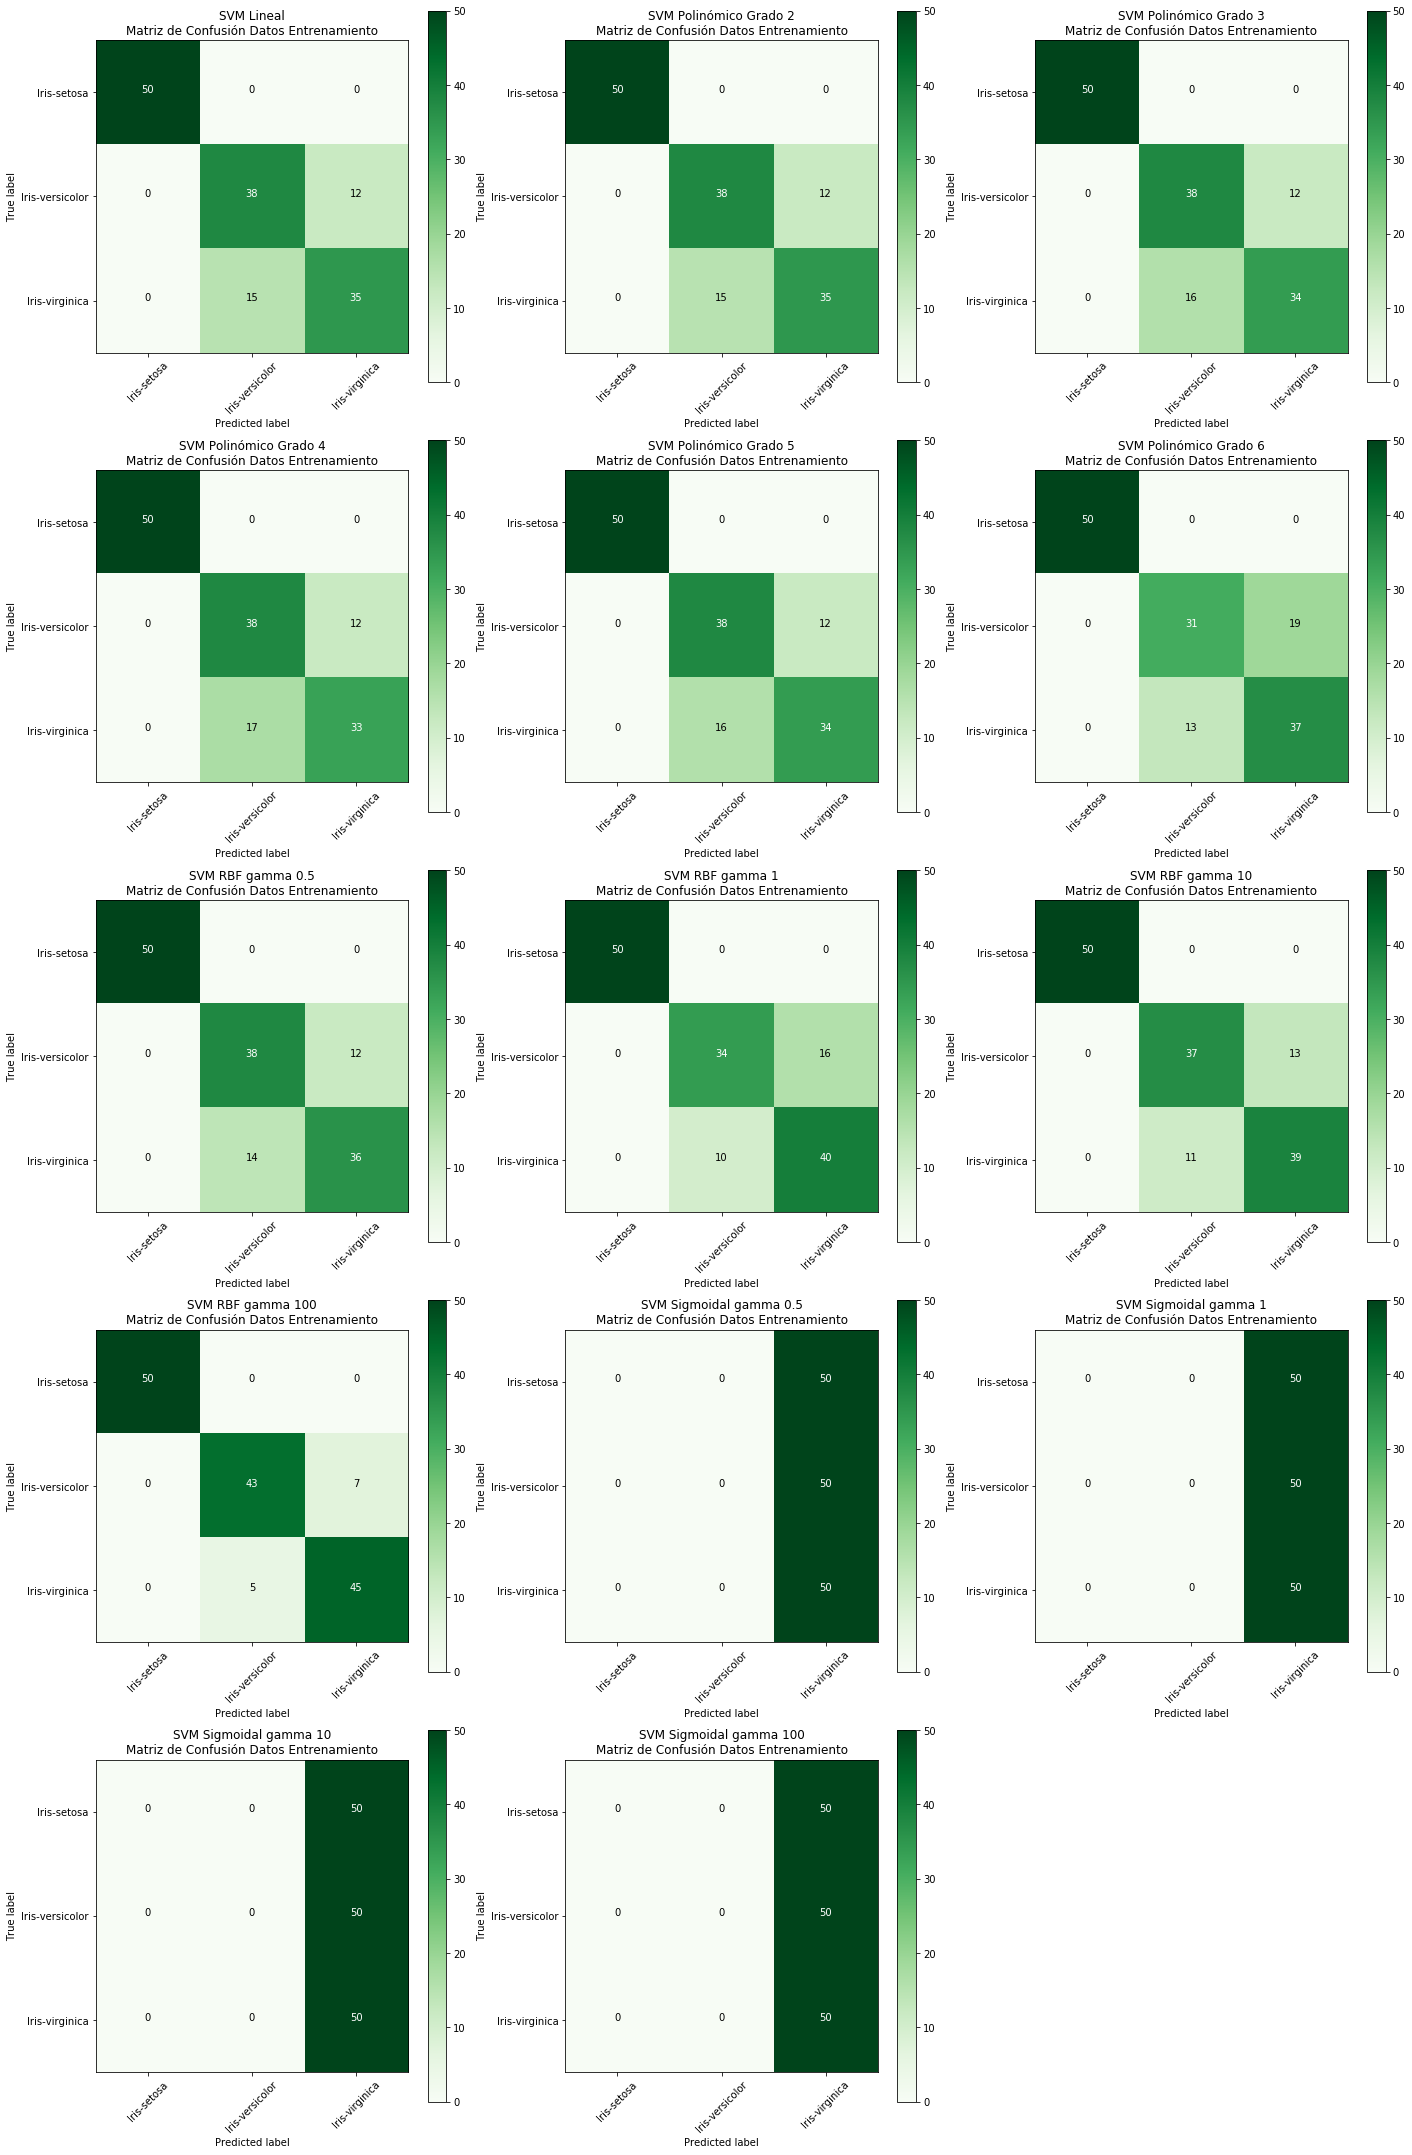

In [7]:
# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    model = {}
    model['name'] = k
    y_pred = v.predict(X)
    model['confusion_matrix'] = confusion_matrix(y_true=y, y_pred=y_pred)
    msc.append(model)

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Pintamos las matrices de confusión
plt.figure(figsize=(20, 30))
for i, mc in enumerate(msc):
    plt.subplot(5, 3, i+1)
    plot_confusion_matrix(mc['confusion_matrix'], classes=le.classes_, 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
plt.show()

<hr>


### <a name="M36">3.6. Visualización de los resultados</a>


* A continuación pasamos a ver de namera visual como clasifica los elementos los diferentes modelos creados:

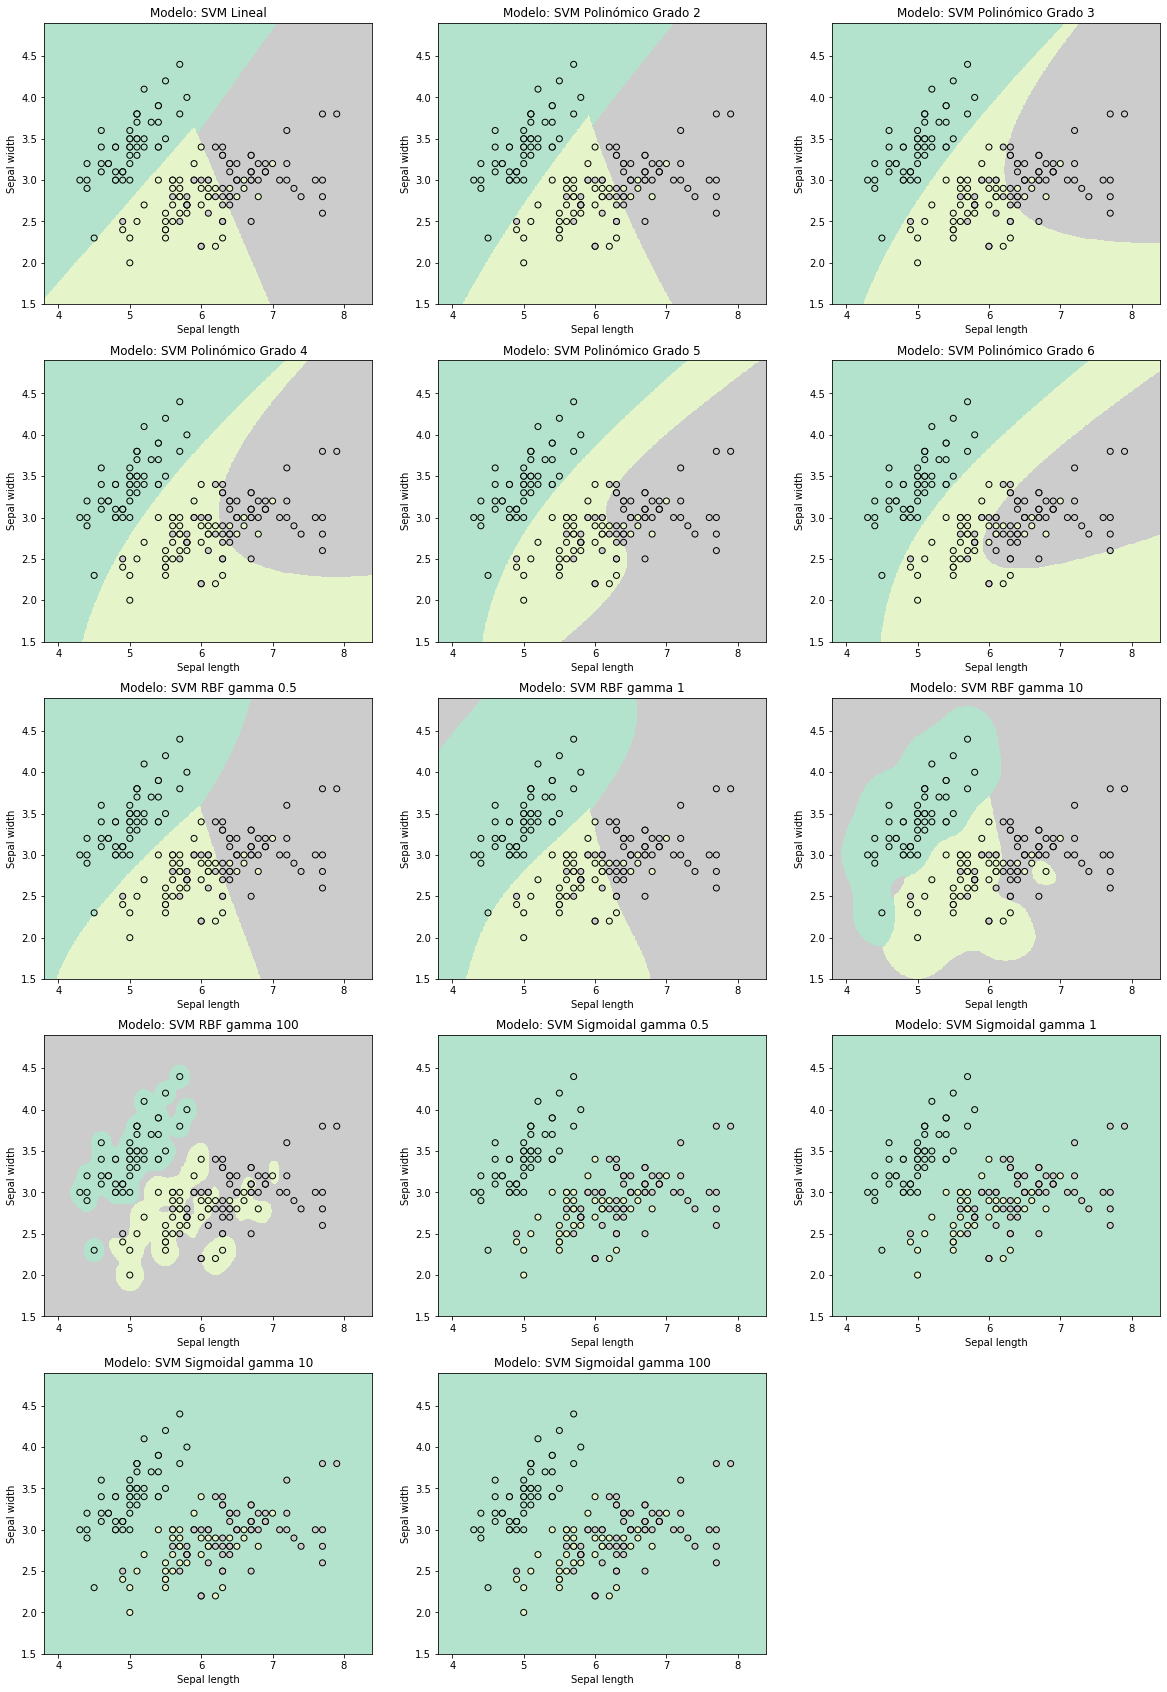

In [8]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(20, 30))
i=0
for k, v in clasificadores.items():
    plt.subplot(5, 3, i+1)
    Z = v.predict(np.c_[xx.ravel(), yy.ravel()]) # Predicción de cada uno de los puntos de la malla
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)    # Dibujamos la malla con los diferentes colores
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Pastel2) # Dibujamos los puntos (flores) del dataset
    plt.title('Modelo: {}'.format(k))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    i +=1
plt.show()


<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">